# Classification - Assignment 1

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

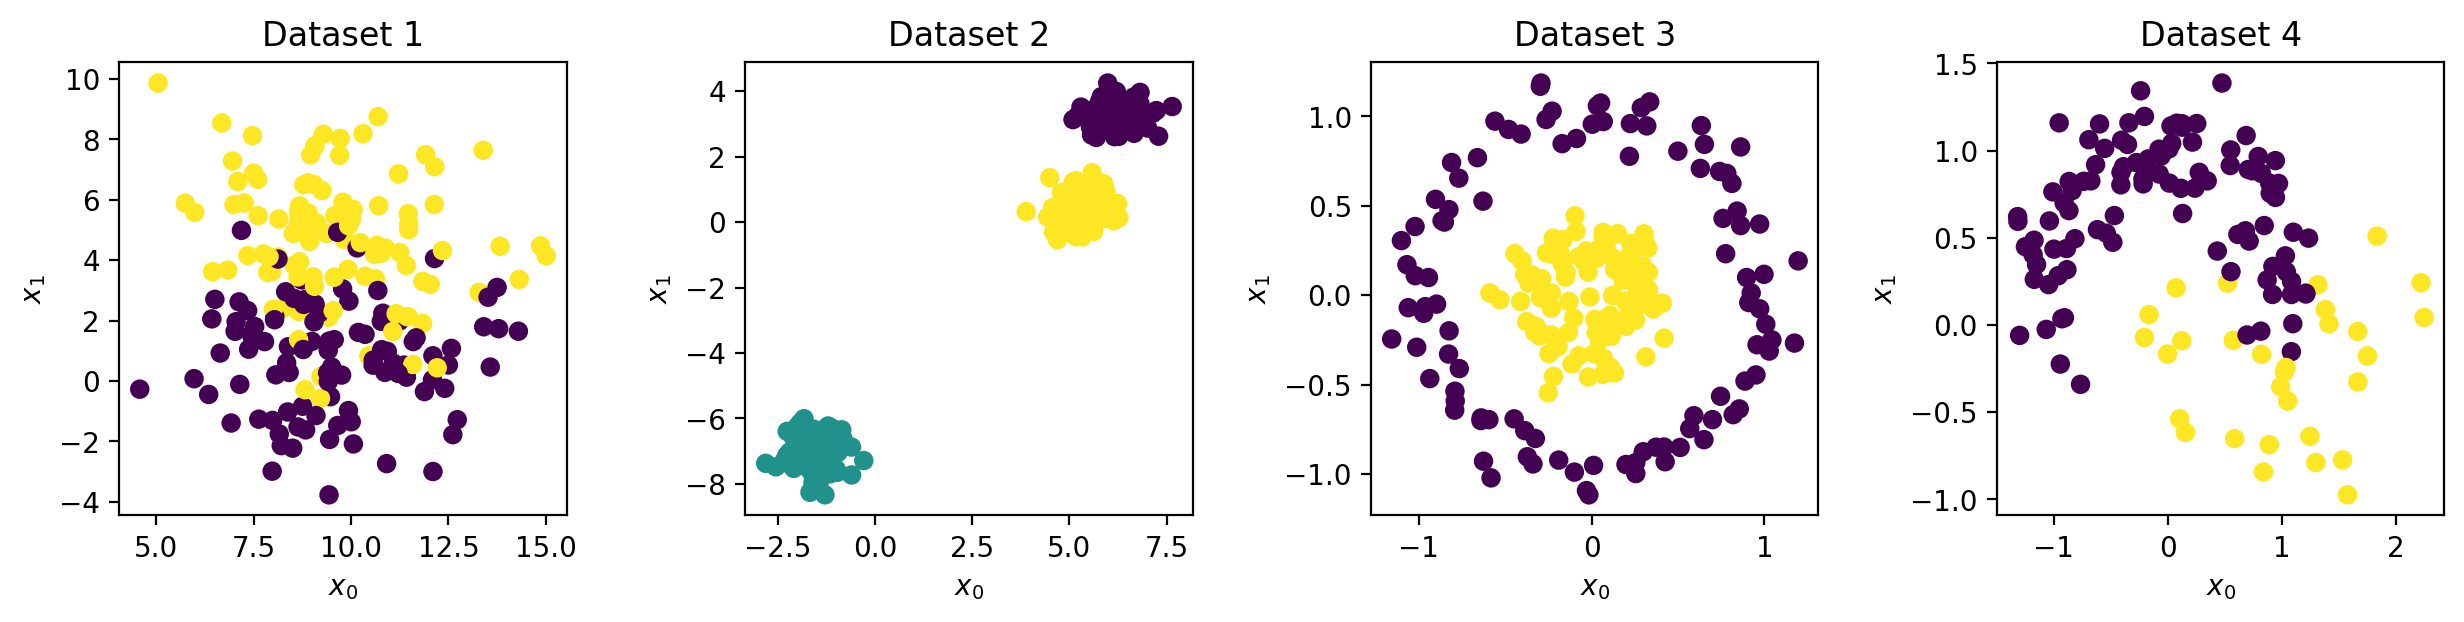

In [3]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

## 1. Discrimination Lines

**Derive the equation for the line that discriminates between the two classes.**

Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

**Derive the discrimination line for a related non-linear model**

In this case, consider a model defined by:

$y_i = w_0 x_0 + w_1 x_1 + w_2 (x_0^2 + x_1^2)$

where the model predicts class 1 if $y_i > 0$ and predicts class 2 if $y_i \leq 0$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

**Briefly describe the nature of this boundary.**

What is the shape of the boundary? Is it linear or non-linear?

## 2. Assessing Loss Functions

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

In [ ]:
def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

**Write a function that computes the loss function for the perceptron model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [ ]:
def perceptron(w, X, y):
    
    return loss

**Write a function that computes the loss function for the logistic regression model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [ ]:
def log_reg(w, X, y):
    
    return loss

**Minimize the both loss functions using the Dataset 3 above.**

In [ ]:
from scipy.optimize import minimize

**What is the value of the loss function for the perceptron model after optimization?**

**What is the value of the loss function for the logistic regression model after optimization?**

**What are the two main challenges of the perceptron loss function?**

## 3. Support Vector Machine

**Write a function that computes the loss function of the support vector machine model.**

This functions should take the followings as arguments:

- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$
- regularization strength $\alpha$

You may want to use `add_intercept` and `linear_classifier` functions from the Problem 2.

In [ ]:
def svm(w, X, y, alpha):
    
    return loss

**Evaluate the effect of regularization strength.**

Optimize the SVM model for **Dataset 1**.

Search over $\alpha$ = [0, 1, 2, 10, 100] and assess the loss function of the SVM model.

**Plot the discrimination lines for $\alpha$ = [0, 1, 2, 10, 100].**

In [ ]:
fig, axes = plt.subplots(1, 5, figsize = (18, 3), dpi = 200)

**Find the optimal set of hyperparameters for an SVM model with Dataset 1.**

Use `GridSearchCV` and find the optimal value of $\alpha$ and $\gamma$.

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')

**Calculate the accruacy, precision, and recall for the best model.**

You can write your own function that calculates the metrics or you may use built-in functions.

**Plot the confusion matrix.**

In [ ]:
from sklearn.metrics import confusion_matrix

**What happens to the decision boundary as $\alpha$ goes to $\infty$?**

**What happens to the decision boundary as $\gamma$ goes to 0?**

## 4. 6745 Only: Analytical Derivation

**Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.**

The **softmax** loss function is defined as:

$g(\vec{w}) = \sum_i log(1 + \exp{(-y_i \vec{x}_i^T \vec{w}}))$

where $\vec{x}_i$ is the $i$-th row of the input matrix $\bar{\bar{X}}$.

*Hint 1: The function $g(\vec{w})$ can be expressed as $f(r(s(\vec{w})))$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.*

*Hint 2: You may want to review Ch. 4 of "Machine Learning Refined, 1st Ed."*

**Optional: Logistic regression from the regression perspective**

An alternate interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is whether 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the *tanh* function:

$\tanh{(x)} = \frac{2}{1 + \exp{(-x)}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \tanh{(\bar{\bar{X}}\vec{w})}$

Show that this is mathematically equivalent to **logistic regression**, or minimization of the **softmax** cost function.